In [22]:
# Regression Model Notebook

## 1. Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [23]:
df = pd.read_json('data/df_final.json')

In [24]:
df.head()

,Ziekteverzuimpercentage_1,Arbeidsjaren_23,GewerkteUren_24,SocialePremiesSeizoengecorrigeerd_6,SocialePremiesTLVWerkgevers_5,BeloningSeizoengecorrigeerd_2,LonenSeizoengecorrigeerd_4,Loonkosten_7,BeloningVanWerknemers_1,Totaal_27,Lonen_3,Mannen_28,Vrouwen_29,Jaar,Kwartaal,BedrijfskenmerkenSBI2008
0,2.7,69,32,159,145,770,611,681,689,101,544,67,33,2016,1,"A Landbouw, bosbouw en visserij"
2,5.5,575,265,1978,2005,9320,7342,8963,9022,636,7017,504,132,2016,1,C Industrie
5,4.2,269,123,893,893,4060,3167,3884,3898,293,3005,259,34,2016,1,F Bouwnijverheid
9,3.3,218,100,722,727,3989,3267,3905,3939,241,3212,175,66,2016,1,J Informatie en communicatie
10,3.4,196,87,1162,1177,4613,3451,4599,4604,221,3427,122,98,2016,1,K Financiële dienstverlening


In [25]:
# Define the target variable
target_variable = 'Ziekteverzuimpercentage_1'

# Define the columns to exclude from features
columns_to_exclude = [target_variable, 'Jaar', 'Kwartaal', 'BedrijfskenmerkenSBI2008']

# Create the list of feature columns by excluding specified columns
feature_columns = [col for col in df.columns if col not in columns_to_exclude]

# Prepare the feature matrix (X) and target vector (y)
X = df[feature_columns]
y = df[target_variable]

In [26]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
print(f'Training set shape: {X_train.shape}, {y_train.shape}')
print(f'Testing set shape: {X_test.shape}, {y_test.shape}')


Training set shape: (172, 12), (172,)
Testing set shape: (44, 12), (44,)


In [27]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Display the coefficients and intercept
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')


Coefficients: [ 0.0124339  -0.00782636  0.00567766 -0.00291599  0.00312476 -0.0025529
 -0.00568473  0.00076424  0.00307994  0.00368022 -0.00341425 -0.00657259]
Intercept: 2.765296294856113


In [28]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.30346870795000935
R-squared: 0.7892238192031907


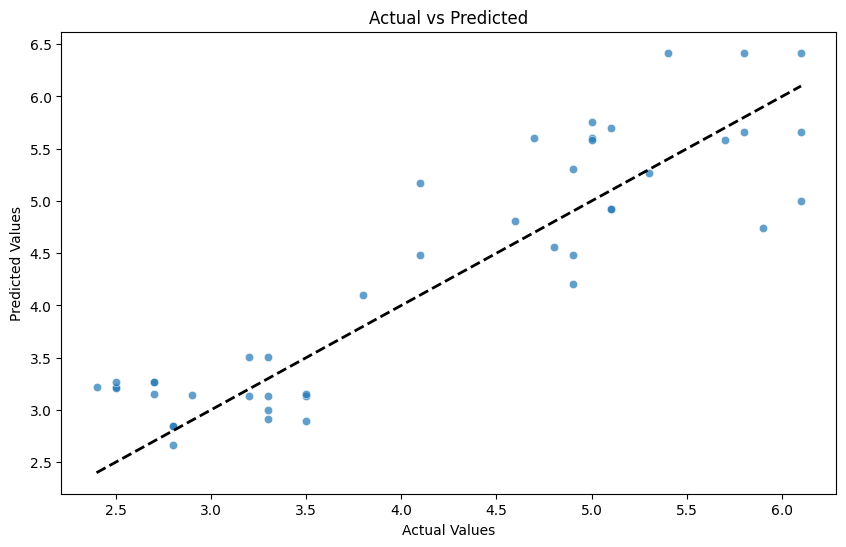

In [29]:
# Create a DataFrame for plotting
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=results, alpha=0.7)
plt.plot([results['Actual'].min(), results['Actual'].max()], [results['Actual'].min(), results['Actual'].max()], 'k--', lw=2)
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


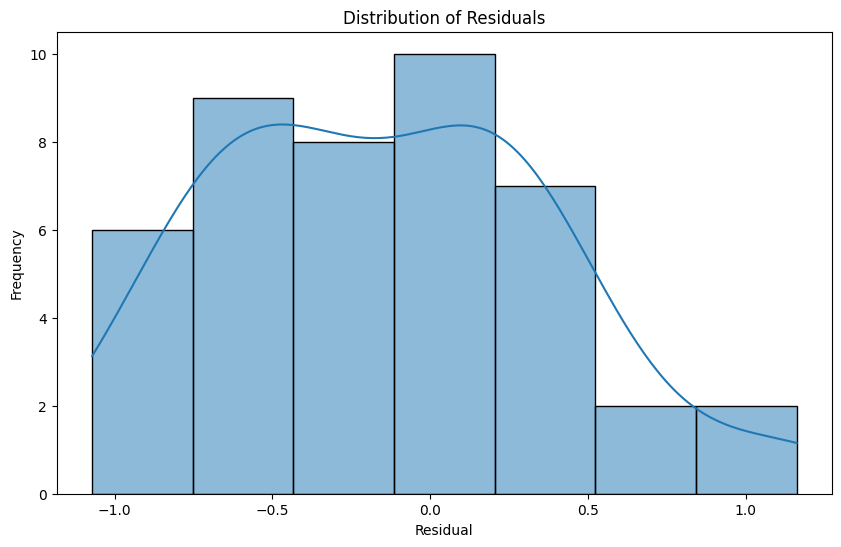

In [30]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()
